<a href="https://colab.research.google.com/github/JamshedAli18/100-Pandas-Puzzles/blob/main/Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pipelines** 🏭

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Creating a sample DataFrame

In [7]:
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female', np.nan, 'Male'],
    'Occupation': ['Engineer', 'Doctor', 'Artist', np.nan, 'Engineer', 'Doctor', 'Artist', 'Engineer', 'Doctor', np.nan],
    'Marital_Status': ['Married', 'Single', np.nan, 'Married', 'Single', 'Married', 'Single', np.nan, 'Married', 'Single'],
    'Salary': [70000, 80000, 50000, 60000, 75000, 85000, np.nan, 72000, 78000, np.nan]  # Numeric output column
}
df = pd.DataFrame(data)

df.head(10)

,Gender,Occupation,Marital_Status,Salary
0,Male,Engineer,Married,70000.0
1,Female,Doctor,Single,80000.0
2,Female,Artist,NaN,50000.0
3,Male,NaN,Married,60000.0
4,Female,Engineer,Single,75000.0
5,NaN,Doctor,Married,85000.0
6,Male,Artist,Single,NaN
7,Female,Engineer,NaN,72000.0
8,NaN,Doctor,Married,78000.0
9,Male,NaN,Single,NaN


### Missing Value Imputation

#### Checking for missing values in `Salary` column

In [8]:
df['Salary'].isnull().sum()

2

#### Missing value imputation in `Salary` column
Using `SimpleImputer` fitted on `Salary` column

In [9]:
impute_salary  = SimpleImputer()
df['Salary'] = impute_salary.fit_transform(df[['Salary']])

df['Salary'].isnull().sum()

0

### Train and Test splits

In [10]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Salary',axis=1) ,df['Salary'], test_size=0.2)

In [21]:
X_train
# X_test
# y_test

,Gender,Occupation,Marital_Status
1,Female,Doctor,Single
2,Female,Artist,NaN
8,NaN,Doctor,Married
9,Male,NaN,Single
4,Female,Engineer,Single
0,Male,Engineer,Married
6,Male,Artist,Single
5,NaN,Doctor,Married


### Defining the **Transformers**

In [22]:
trf1 = ColumnTransformer([('imputer', SimpleImputer(strategy='most_frequent'), [0,1,2])], remainder='passthrough')

In [25]:
trf2 = ColumnTransformer([('encoder', OneHotEncoder(sparse_output=False, drop='first'), [0,1,2])])

In [24]:
trf3 = LinearRegression()

### Creating the **Pipeline**

In [31]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

### **Fitting** the training data into the pipeline

In [32]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2])])),
                ('trf2',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2])])),
                ('trf3', LinearRegression())])

### Model prediction

In [29]:
y_pred = pipe.predict(X_test)

y_pred

array([71142.85714286, 80035.71428571])

### **Results**

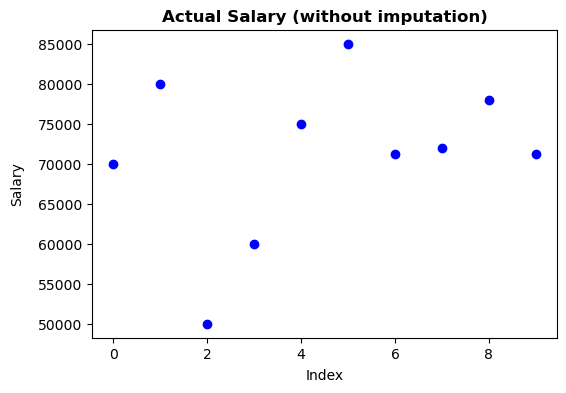

In [48]:
plt.figure(figsize=(6, 4))
plt.scatter(range(len(df)), df['Salary'], c='blue', label='Actual Salary')

plt.title('Actual Salary (without imputation)', fontdict={'fontweight': 'bold'})
plt.xlabel('Index', labelpad=5)
plt.ylabel('Salary', labelpad=10)

plt.show()

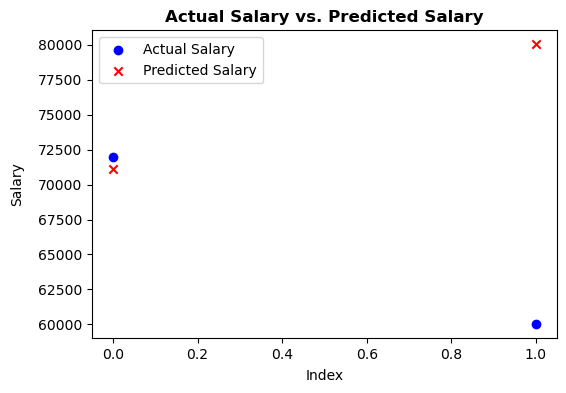

In [46]:
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual Salary')
plt.scatter(range(len(y_test)), y_pred, c='red', label='Predicted Salary', marker='x')

plt.title("Actual Salary vs. Predicted Salary", fontweight='bold')
plt.xlabel('Index', labelpad=5)
plt.ylabel('Salary', labelpad=10)
plt.legend()

plt.show()

In [ ]:
# Feel free to code ...
